In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas
import seaborn as sns

Analysing the skewness and kurtosis of data including black monday crash and excluding black monday 19th oct 1987

In [5]:
sp500 = pandas.read_csv('sp5001987.csv', usecols=['date', 'adj_close'])  
sp500.head()
sp500.tail()
sp500.dtypes

,date,adj_close
0,1/2/1984,164.93
1,1/3/1984,164.04
2,1/4/1984,166.78
3,1/5/1984,168.81
4,1/6/1984,169.28


,date,adj_close
1300,12/26/1988,277.87
1301,12/27/1988,276.83
1302,12/28/1988,277.08
1303,12/29/1988,279.40
1304,12/30/1988,277.72


date          object
adj_close    float64
dtype: object

In [6]:
sp500['date'] = pandas.to_datetime(sp500.date)

In [8]:
sp500.dtypes

date         datetime64[ns]
adj_close           float64
dtype: object

In [9]:
sp500 = sp500.sort_values(by='date')

In [10]:
sp500.head()

,date,adj_close
0,1984-01-02,164.93
1,1984-01-03,164.04
2,1984-01-04,166.78
3,1984-01-05,168.81
4,1984-01-06,169.28


In [11]:
sp500['returns_pct_change'] = sp500.adj_close.pct_change()

In [13]:
sp500.head()

,date,adj_close,returns_pct_change
0,1984-01-02,164.93,NaN
1,1984-01-03,164.04,-0.005396
2,1984-01-04,166.78,0.016703
3,1984-01-05,168.81,0.012172
4,1984-01-06,169.28,0.002784


In [19]:
sp500.dropna(inplace=True)

In [20]:
sp500.count()

date                  1304
adj_close             1304
returns_pct_change    1304
dtype: int64

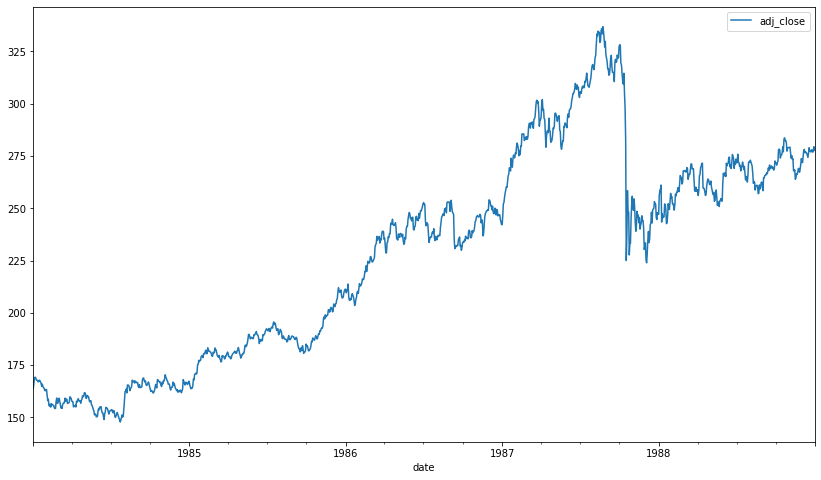

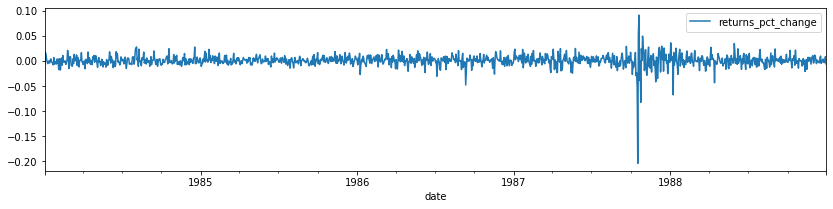

In [41]:
sp500.plot(x = 'date', y = 'adj_close', figsize = (14,8))
sp500.plot(x = 'date', y = 'returns_pct_change', figsize = (14,3))

# skewness and kurtosis including 19th oct 1987`

In [30]:
print('kurtosis')
sm.stats.stattools.robust_kurtosis(sp500.returns_pct_change, excess=False) # if excess = true excess kurtosis is outputted

kurtosis


(78.35012781022579, 1.4850111011326488, 3.5558070061833047, 4.2030282925705285)

so the entire distribution is heavily fat 

In [27]:
print('skewness')
sm.stats.stattools.robust_skewness(sp500.returns_pct_change)

skewness


(-4.114608859724057,
 0.04761663172966041,
 0.022739411653265196,
 1.15953309919343)

and skewness is negative 

# skewness and kurtosis exclusing 19th oct 1987

In [32]:
sp500_without_blackmonday = sp500.loc[sp500.date!='1987-10-19']
sp500_without_blackmonday.count()

date                  1303
adj_close             1303
returns_pct_change    1303
dtype: int64

In [33]:
print('kurtosis')
sm.stats.stattools.robust_kurtosis(sp500_without_blackmonday.returns_pct_change, excess=False) # if excess = true excess kurtosis is outputted

kurtosis


(14.12165970796038, 1.4840093003349082, 3.423369774923658, 4.191051743165101)

In [34]:
print('skewness')
sm.stats.stattools.robust_skewness(sp500_without_blackmonday.returns_pct_change)

skewness


(-0.17430154987622484,
 0.046591348130324436,
 0.04426402606164493,
 2.873355969992143)

## we can see that just dropping one data point makes the entire data less negatively skewed and less fat in the tails.